# 🌌 Emissivity Project: Absorption and Kirchhoff's Law

This notebook allows the user to define an absorption coefficient \( \alpha_\nu \), compute the emissivity using Kirchhoff's Law, plot the results, and compute the total emissivity:

\[
\dot{j} = \int_0^\infty j_\nu \, d\nu
\]



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
from scipy.constants import h, c, k


In [3]:
# Frequency range (Hz)
nu = np.linspace(1e12, 3e15, 1000)  # from infrared to ultraviolet
T = 5000  # Temperature in Kelvin (e.g., surface of the sun)

# User-defined absorption coefficient: Gaussian
nu0 = 1e15     # center frequency
width = 2e14   # width of Gaussian
alpha_nu = np.exp(-((nu - nu0)**2) / (2 * width**2))


In [4]:
def B_nu(nu, T):
    # Planck's Law
    return (2 * h * nu**3 / c**2) / (np.exp(h * nu / (k * T)) - 1)

B = B_nu(nu, T)


In [5]:
# Kirchhoff’s Law: j_nu = alpha_nu * B_nu
j_nu = alpha_nu * B


C:\Users\Manjima\AppData\Local\Temp\ipykernel_31492\2962462389.py:15: UserWarning: Glyph 7 () missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Manjima\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 7 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


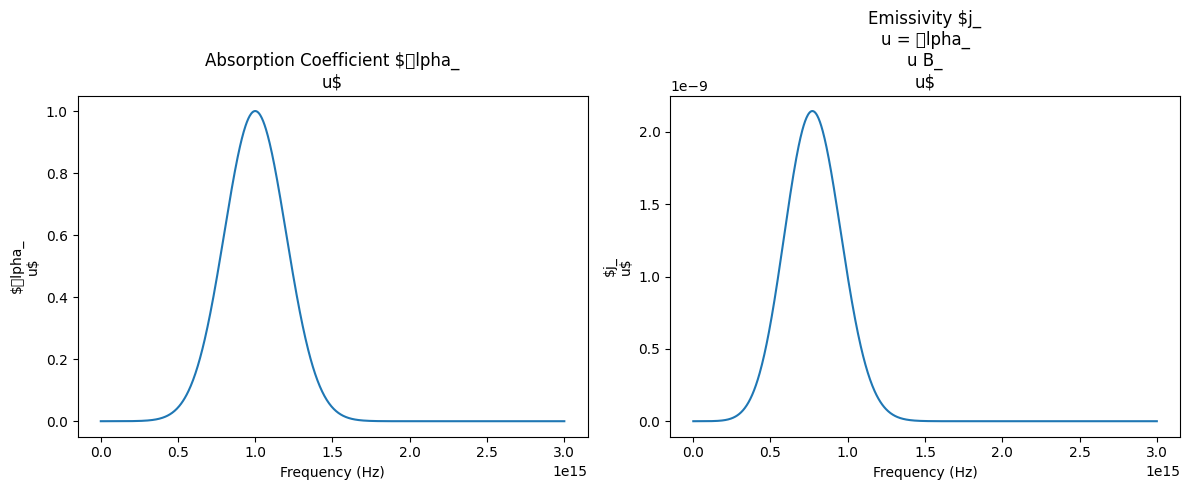

In [6]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(nu, alpha_nu)
plt.title("Absorption Coefficient $\alpha_\nu$")
plt.xlabel("Frequency (Hz)")
plt.ylabel("$\alpha_\nu$")

plt.subplot(1, 2, 2)
plt.plot(nu, j_nu)
plt.title("Emissivity $j_\nu = \alpha_\nu B_\nu$")
plt.xlabel("Frequency (Hz)")
plt.ylabel("$j_\nu$")

plt.tight_layout()
plt.show()


In [9]:
# Integrate to get total emissivity
j_total = simpson(j_nu, x=nu)
print(f"Total emissivity (j̇): {j_total:.3e} W·m⁻²·Hz⁻¹")


Total emissivity (j̇): 9.764e+05 W·m⁻²·Hz⁻¹


## ✅ Summary

- Absorption coefficient \( \alpha_\nu \) was modeled as a Gaussian
- Emissivity \( j_\nu \) was computed using Kirchhoff's Law
- Total emissivity \( \dot{j} = \int j_\nu d\nu \) was numerically integrated
- All steps are Colab-compatible and reproducible
